In [100]:
import os
import glob 
from functools import reduce

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6) 
plt.rcParams['font.size'] = 14

In [233]:
results_dir = "../../../../results/apps/lb/"
date_time_list = [" 20170901055404.623654"]

## Client side stats

In [234]:
data_dict = {}

for date_time in date_time_list:
    for i in glob.glob(results_dir + date_time + "/httperf-clients-*/httperf-plot.log"):
        key = i.split('/')[-2].split('-')[-1]
        data_dict[key] = pd.read_csv(i, header=0, na_filter=False)

In [235]:
plot_data = pd.DataFrame()

if len(data_dict) > 0:
    for i in data_dict[list(data_dict.keys())[0]].columns:
        if not i.startswith('Response time'):
            plot_data[i] = reduce(lambda x, y: x + y, [data_dict[j][i] for j in data_dict])
        else:
            plot_data[i] = reduce(lambda x, y: x + y, [data_dict[j][i] 
                                                       for j in data_dict]) / len(data_dict)

### 1. Request rate

In [236]:
rr_plot_data = plot_data[['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                          'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                          'Response rate 99%', 'Response rate 100%']]
rr_plot_data

KeyError: "['Request rate' 'Response rate 50%' 'Response rate 66%' 'Response rate 75%'\n 'Response rate 80%' 'Response rate 90%' 'Response rate 95%'\n 'Response rate 98%' 'Response rate 99%' 'Response rate 100%'] not in index"

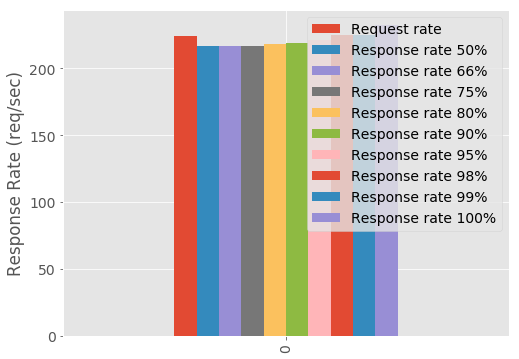

In [229]:
rr_plot_data.plot(ylim=(0, None), kind='bar').set_ylabel("Response Rate (req/sec)")

In [230]:
# rr_plot_data.to_csv(results_dir + run_name + "/response_rate.csv")

### 1. Request time

In [231]:
rt_plot_data = plot_data[['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                          'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                          'Response time 99%', 'Response time 100%']]
rt_plot_data

,Response time,Response time 50%,Response time 66%,Response time 75%,Response time 80%,Response time 90%,Response time 95%,Response time 98%,Response time 99%,Response time 100%
0,28.457143,23.142857,24.571429,26.571429,27.857143,33.285714,36.571429,69.714286,133.285714,531.285714


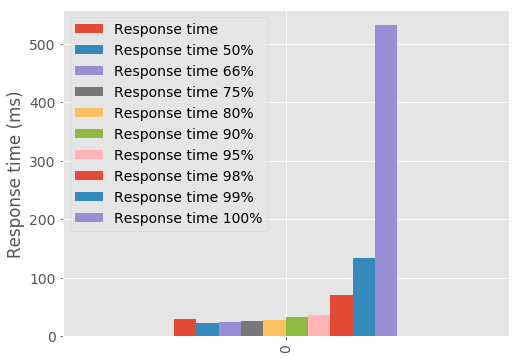

In [232]:
rt_plot_data.plot(ylim=(0, None), kind='bar').set_ylabel("Response time (ms)")

In [81]:
# rt_plot_data.to_csv(results_dir + run_name + "/response_time.csv")

### 3. Success rate

In [82]:
sr_plot_data = (plot_data['Response status 2xx'] + plot_data['Response status 3xx']) / plot_data['Number of requests'] * 100.0
sr_plot_data

0    100.0
dtype: float64

In [13]:
plot_data['Response status 4xx']

0    0
Name: Response status 4xx, dtype: int64

## Timeseries analysis

In [14]:
ts_data_dict = {}
ts_data_dict['ipvsadm_L_n'] = {}
ts_data_dict['ipvsadm_L_n__stats'] = {}

for date_time in date_time_list:
    for i in glob.glob(results_dir + date_time + "/ipvsadm_L_n*.csv"):
        stats_type = i.split('/')[-1].split('.')[0]
        if stats_type == 'ipvsadm_L_n':
            key = i.split('/')[-1].split('.')[1]
            ts_data_dict[stats_type][key] = pd.read_csv(i, header=0, na_filter=False)
        elif stats_type == 'ipvsadm_L_n__stats':
            key = i.split('/')[-1].split('.')[1]
            ts_data_dict[stats_type][key] = pd.read_csv(i, header=0, na_filter=False)

In [15]:
ts_plot_data = {}
ts_plot_data['ipvsadm_L_n'] = pd.DataFrame()
ts_plot_data['ipvsadm_L_n__stats'] = pd.DataFrame()

if len(ts_data_dict['ipvsadm_L_n']) > 0:
    for i in ts_data_dict['ipvsadm_L_n'][list(ts_data_dict['ipvsadm_L_n'].keys())[0]].columns:
        if i.startswith('192.168.1.120'):
            continue
        if i.endswith('Weight'):
            ts_plot_data['ipvsadm_L_n'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n'][j][i] for j in ts_data_dict['ipvsadm_L_n']])
            ts_plot_data['ipvsadm_L_n'] = ts_plot_data['ipvsadm_L_n'].dropna()
        elif i.endswith('ActiveConn'):
            ts_plot_data['ipvsadm_L_n'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n'][j][i] for j in ts_data_dict['ipvsadm_L_n']])
            ts_plot_data['ipvsadm_L_n'] = ts_plot_data['ipvsadm_L_n'].dropna()
        elif i.endswith('InActConn'):
            ts_plot_data['ipvsadm_L_n'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n'][j][i] for j in ts_data_dict['ipvsadm_L_n']])
            ts_plot_data['ipvsadm_L_n'] = ts_plot_data['ipvsadm_L_n'].dropna()

if len(ts_data_dict['ipvsadm_L_n__stats']) > 0:
    for i in ts_data_dict['ipvsadm_L_n__stats'][list(ts_data_dict['ipvsadm_L_n__stats'].keys())[3]].columns:
        if i.startswith('192.168.1.120'):
            continue
        if i.endswith('InPkts'):
            ts_plot_data['ipvsadm_L_n__stats'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n__stats'][j][i] for j in ts_data_dict['ipvsadm_L_n__stats']])
            ts_plot_data['ipvsadm_L_n__stats'] = ts_plot_data['ipvsadm_L_n__stats'].dropna()
        elif i.endswith('OutPkts'):
            ts_plot_data['ipvsadm_L_n__stats'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n__stats'][j][i] for j in ts_data_dict['ipvsadm_L_n__stats']])
            ts_plot_data['ipvsadm_L_n__stats'] = ts_plot_data['ipvsadm_L_n__stats'].dropna()
        elif i.endswith('InBytes'):
            ts_plot_data['ipvsadm_L_n__stats'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n__stats'][j][i] for j in ts_data_dict['ipvsadm_L_n__stats']])
            ts_plot_data['ipvsadm_L_n__stats'] = ts_plot_data['ipvsadm_L_n__stats'].dropna()
        elif i.endswith('OutBytes'):
            ts_plot_data['ipvsadm_L_n__stats'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n__stats'][j][i] for j in ts_data_dict['ipvsadm_L_n__stats']])
            ts_plot_data['ipvsadm_L_n__stats'] = ts_plot_data['ipvsadm_L_n__stats'].dropna()
        elif i.endswith('Conns'):
            ts_plot_data['ipvsadm_L_n__stats'][i] = reduce(lambda x, y: x + y, [ts_data_dict['ipvsadm_L_n__stats'][j][i] for j in ts_data_dict['ipvsadm_L_n__stats']])
            ts_plot_data['ipvsadm_L_n__stats'] = ts_plot_data['ipvsadm_L_n__stats'].dropna()

### 1st stats

In [16]:
ts_plot_data['ipvsadm_L_n'].head()

,10.2.120.4:Weight,10.2.120.4:ActiveConn,10.3.120.5:ActiveConn,10.3.120.8:InActConn,10.2.120.4:InActConn,10.2.120.8:ActiveConn,10.2.120.7:ActiveConn,10.2.120.5:Weight,10.2.120.5:InActConn,10.3.120.6:ActiveConn,...,10.2.120.6:ActiveConn,10.3.120.3:InActConn,10.3.120.7:InActConn,10.3.120.4:ActiveConn,10.3.120.7:Weight,10.2.120.3:Weight,10.3.120.2:ActiveConn,10.3.120.3:Weight,10.3.120.2:Weight,10.3.120.5:Weight
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0
2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0
3,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0
4,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,5.0,0.0,5.0,5.0,5.0


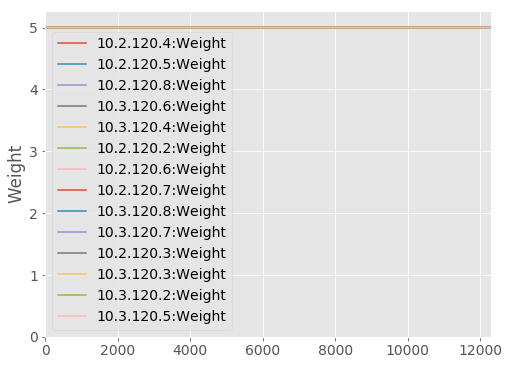

In [17]:
wt_plot_data = pd.DataFrame()

wt_plot_data = ts_plot_data['ipvsadm_L_n'][[i for i in ts_plot_data['ipvsadm_L_n'].columns if i.endswith('Weight')]]

wt_plot_data.plot(ylim=(0, None)).set_ylabel("Weight")

In [18]:
wt_plot_data.mean()

10.2.120.4:Weight    5.0
10.2.120.5:Weight    5.0
10.2.120.8:Weight    5.0
10.3.120.6:Weight    5.0
10.3.120.4:Weight    5.0
10.2.120.2:Weight    5.0
10.2.120.6:Weight    5.0
10.2.120.7:Weight    5.0
10.3.120.8:Weight    5.0
10.3.120.7:Weight    5.0
10.2.120.3:Weight    5.0
10.3.120.3:Weight    5.0
10.3.120.2:Weight    5.0
10.3.120.5:Weight    5.0
dtype: float64

#### Active Conns

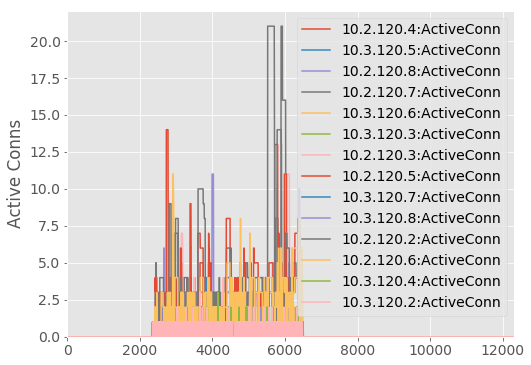

In [19]:
ac_plot_data = pd.DataFrame()

ac_plot_data = ts_plot_data['ipvsadm_L_n'][[i for i in ts_plot_data['ipvsadm_L_n'].columns if i.endswith('ActiveConn')]]

ac_plot_data.plot(ylim=(0, None)).set_ylabel("Active Conns")

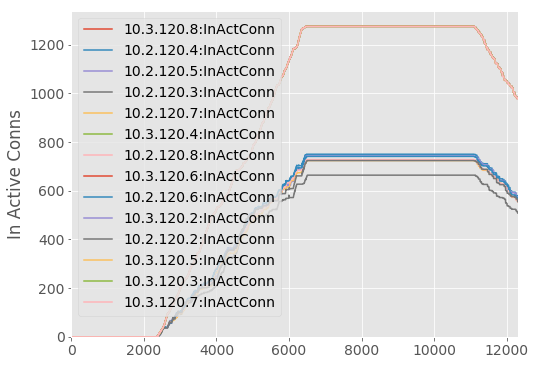

In [20]:
iac_plot_data = pd.DataFrame()

iac_plot_data = ts_plot_data['ipvsadm_L_n'][[i for i in ts_plot_data['ipvsadm_L_n'].columns if i.endswith('InActConn')]]

iac_plot_data.plot(ylim=(0, None)).set_ylabel("In Active Conns")

### 2nd Stats

In [21]:
ts_plot_data['ipvsadm_L_n__stats'].head()

,10.3.120.2:InPkts,10.2.120.2:InBytes,10.3.120.4:OutPkts,10.3.120.8:OutBytes,10.3.120.5:OutPkts,10.2.120.4:InBytes,172.16.254.145:OutBytes,10.3.120.5:InPkts,10.2.120.3:Conns,10.3.120.6:InPkts,...,10.2.120.3:OutBytes,10.2.120.8:OutBytes,10.2.120.2:Conns,10.2.120.7:InBytes,172.16.254.1:InPkts,10.2.120.7:Conns,10.3.120.3:Conns,10.2.120.2:OutPkts,10.3.120.6:OutPkts,10.3.120.8:InPkts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


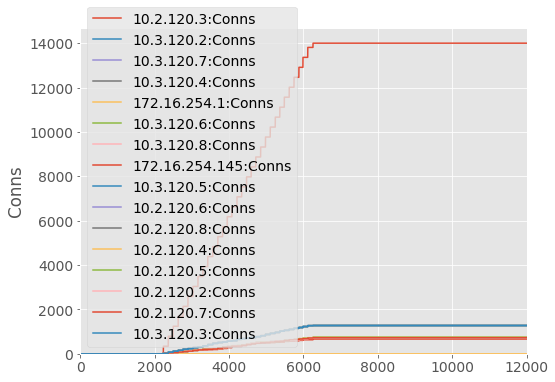

In [22]:
cn_plot_data = pd.DataFrame()

cn_plot_data = ts_plot_data['ipvsadm_L_n__stats'][[i for i in ts_plot_data['ipvsadm_L_n__stats'].columns if i.endswith('Conns')]]

cn_plot_data.plot(ylim=(0, None)).set_ylabel("Conns")